In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [2]:
warnings.filterwarnings('ignore')



In [3]:
import os
source_dir=os.path.join('105_classes_pins_dataset')

In [4]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(source_dir)

In [5]:
print('metadata shape :', metadata.shape)


metadata shape : (17534,)


In [6]:
metadata[1500]


105_classes_pins_dataset/pins_scarlett johansson/scarlett johansson120_3902.jpg

In [7]:
type(metadata[1500]), metadata[1500].image_path()


(__main__.IdentityMetadata,
 '105_classes_pins_dataset/pins_scarlett johansson/scarlett johansson120_3902.jpg')

In [8]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [10]:
load_image('105_classes_pins_dataset/pins_scarlett johansson/scarlett johansson120_3902.jpg')

array([[[21, 22, 17],
        [19, 20, 15],
        [17, 18, 13],
        ...,
        [56, 52, 40],
        [58, 54, 42],
        [58, 54, 43]],

       [[24, 25, 20],
        [22, 23, 18],
        [20, 21, 16],
        ...,
        [52, 48, 36],
        [60, 56, 44],
        [56, 52, 41]],

       [[25, 26, 21],
        [23, 24, 19],
        [21, 22, 17],
        ...,
        [50, 46, 34],
        [57, 53, 41],
        [56, 52, 41]],

       ...,

       [[51, 49, 34],
        [32, 30, 15],
        [36, 35, 17],
        ...,
        [34, 28, 28],
        [34, 28, 28],
        [25, 19, 19]],

       [[41, 39, 24],
        [32, 30, 15],
        [37, 36, 18],
        ...,
        [30, 24, 24],
        [31, 25, 25],
        [25, 19, 19]],

       [[35, 33, 18],
        [34, 32, 17],
        [41, 40, 22],
        ...,
        [28, 22, 22],
        [29, 23, 23],
        [31, 25, 25]]], dtype=uint8)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

2024-08-10 22:20:03.477246: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 22:20:03.477295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 22:20:03.479051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-10 22:20:03.486986: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-10 22:20:04.802423: W tensorflow/compiler/tf2

In [13]:
model = vgg_face()

model.load_weights('vgg_face_weights.h5')

2024-08-10 22:21:50.242238: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-08-10 22:21:50.821679: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-08-10 22:21:50.924965: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42958848 exceeds 10% of free system memory.


In [14]:
model.layers[0], model.layers[-2]


(<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x7d9886c28cd0>,
 <keras.src.layers.reshaping.flatten.Flatten at 0x7d9878190c90>)

In [15]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [16]:
type(vgg_face_descriptor)


keras.src.engine.functional.Functional

In [17]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs


([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_13_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten_1')>])

In [18]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)


2024-08-10 22:22:36.557142: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-08-10 22:22:36.721496: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 1s 1s/step
(2622,)


2024-08-10 22:22:37.353402: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [19]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])


(0.013812872, numpy.ndarray, numpy.float32)

In [20]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]


(0.0030524188, 0.0024052865, 0.013763502)

In [21]:
total_images = len(metadata)

print('total_images :', total_images)

total_images : 17534


In [22]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

1/1 [==============================] - 0s 17ms/step


In [23]:
print('embeddings shape :', embeddings.shape)


embeddings shape : (17534, 2622)


In [24]:
embeddings[0], embeddings[988], embeddings[988].shape


(array([ 0.01381287, -0.01885964,  0.00305242, ..., -0.01466226,
         0.0137635 ,  0.01258941]),
 array([ 0.01371667, -0.00468203,  0.01807065, ..., -0.01640214,
        -0.01040349,  0.0203457 ]),
 (2622,))

In [25]:
embeddings[8275]


array([ 0.00729692,  0.02816455, -0.00230363, ...,  0.00157801,
        0.00622437,  0.0098042 ])

In [26]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

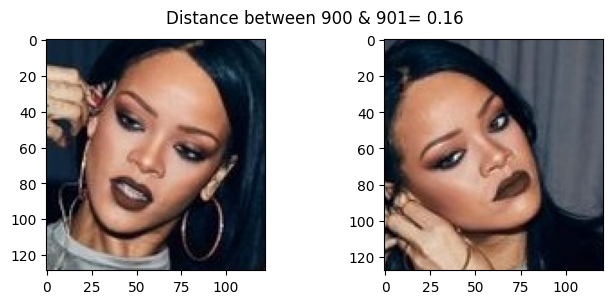

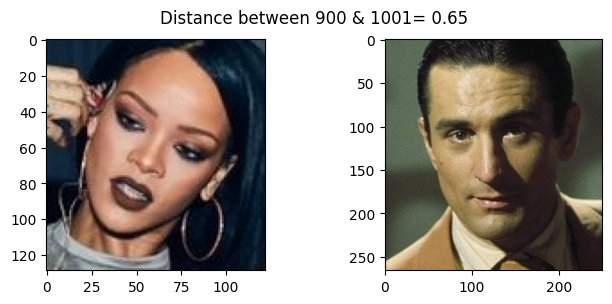

In [27]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(900, 901)
show_pair(900, 1001)

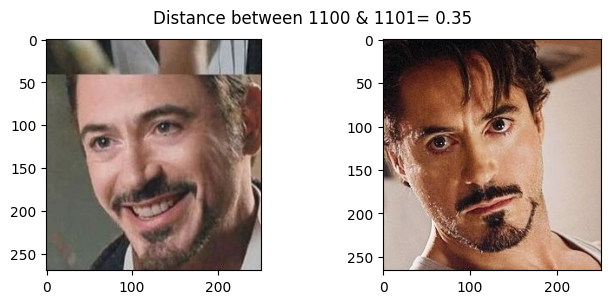

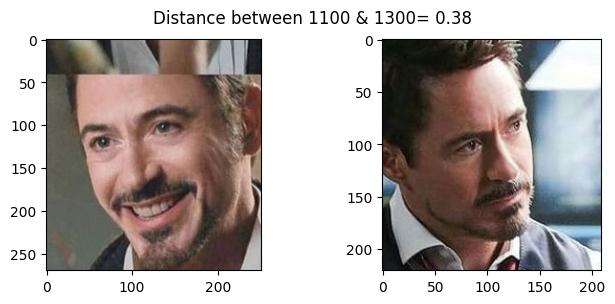

In [28]:
show_pair(1100, 1101)
show_pair(1100, 1300)

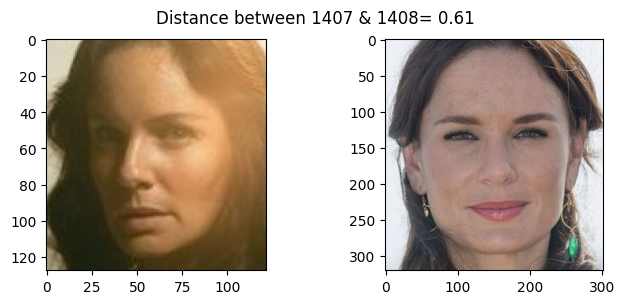

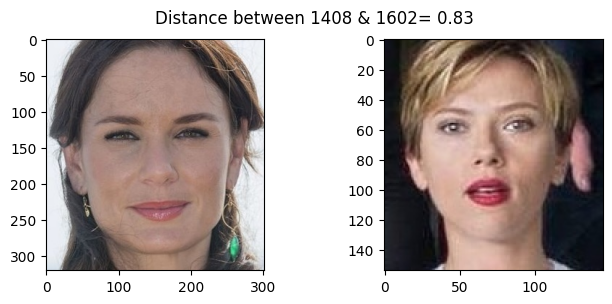

In [29]:
show_pair(1407, 1408)
show_pair(1408, 1602)

In [30]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

In [31]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (15585,2622)
y_train shape : (15585,)
X_test shape : (1949,2622)
y_test shape : (1949,)


In [32]:
len(np.unique(y_test)), len(np.unique(y_train))


(105, 105)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [34]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Adriana Lima' 'pins_Alex Lawther' 'pins_Alexandra Daddario'
 'pins_Alvaro Morte' 'pins_Amanda Crew' 'pins_Andy Samberg'
 'pins_Anne Hathaway' 'pins_Anthony Mackie' 'pins_Avril Lavigne'
 'pins_Ben Affleck' 'pins_Bill Gates' 'pins_Bobby Morley'
 'pins_Brenton Thwaites' 'pins_Brian J. Smith' 'pins_Brie Larson'
 'pins_Chris Evans' 'pins_Chris Hemsworth' 'pins_Chris Pratt'
 'pins_Christian Bale' 'pins_Cristiano Ronaldo' 'pins_Danielle Panabaker'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Eliza Taylor'
 'pins_Elizabeth Lail' 'pins_Emilia Clarke' 'pins_Emma Stone'
 'pins_Emma Watson' 'pins_Gwyneth Paltrow' 'pins_Henry Cavil'
 'pins_Hugh Jackman' 'pins_Inbar Lavi' 'pins_Irina Shayk'
 'pins_Jake Mcdorman' 'pins_Jason Momoa' 'pins_Jennifer Lawrence'
 'pins_Jeremy Renner' 'pins_Jessica Barden' 'pins_Jimmy Fallon'
 'pins_Johnny Depp' 'pins_Josh Radnor' 'pins_Katharine Mcphee'
 'pins_Katherine Langford' 'pins_Keanu Reeves' 'pins_Krysten Ritter'
 'pins_Leonardo DiCaprio' 'pins_Lili R

In [35]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)


y_train_encoded :  [65 65 65 ... 63 63 63]
y_test_encoded :  [65 65 65 ... 63 63 63]


In [36]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [37]:
X_test_std = scaler.transform(X_test)

In [38]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (15585,2622)
y_train_encoded shape : (15585,)
X_test_std shape : (1949,2622)
y_test_encoded shape : (1949,)


In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [40]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [41]:
y_predict = clf.predict(X_test_pca)

In [42]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [65 65 65 ... 63 63 63]
y_test_encoded :  [65 65 65 ... 63 63 63]


In [43]:
y_predict_encoded = le.inverse_transform(y_predict)


In [44]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['pins_Pedro Alonso' 'pins_Pedro Alonso' 'pins_Pedro Alonso' ...
 'pins_Natalie Portman' 'pins_Natalie Portman' 'pins_Natalie Portman']


In [45]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (1949,)
y_test_encoded shape :  (1949,)


In [46]:
y_test_encoded[32:49]


array([66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67])

In [47]:
accuracy_score(y_test_encoded, y_predict)


0.9610056439199589

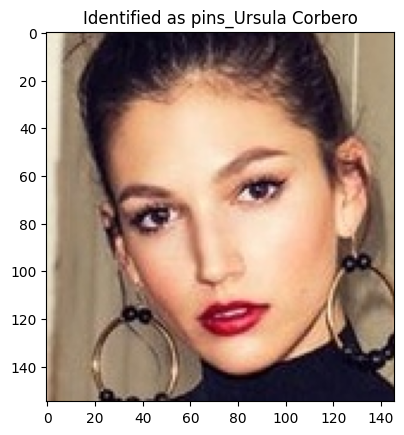

In [48]:
example_idx = 401

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

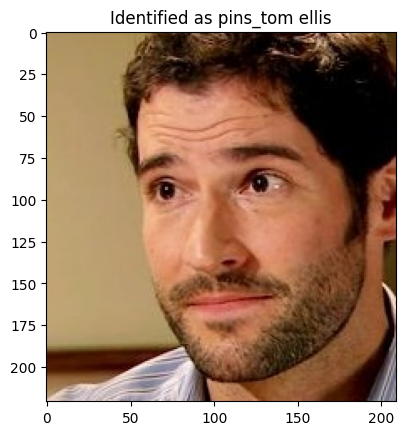

In [53]:
example_idx = 302

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

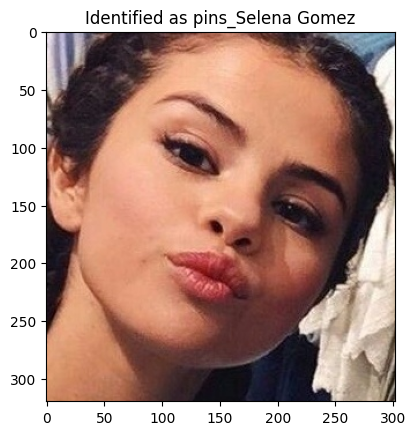

In [54]:
example_idx = 203

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

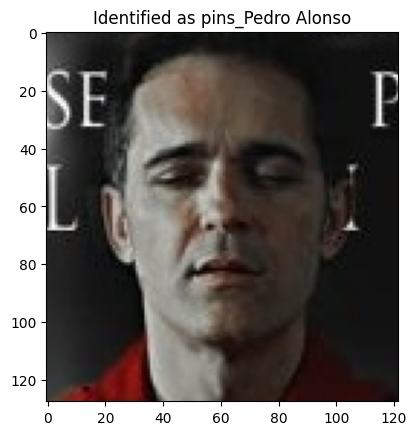

In [52]:
example_idx = 1

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');